<a href="https://colab.research.google.com/github/ShaliniKumari6570/Fake-And-Real-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving News.csv to News.csv


In [ ]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data.shape

(44919, 5)

In [ ]:
data.isna().sum()

,0
title,0
text,0
subject,21
date,21
class,0


In [ ]:
data=data.fillna(' ')

In [ ]:
data.isna().sum()

,0
title,0
text,0
subject,0
date,0
class,0


In [ ]:
data['content'] = data['text']+' '+data['title']

In [ ]:
data

,title,text,subject,date,class,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day mes...
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,MINSK (Reuters) - In the shadow of disused Sov...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,MOSCOW (Reuters) - Vatican Secretary of State ...


In [ ]:
data['content']

,content
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,MINSK (Reuters) - In the shadow of disused Sov...
21415,MOSCOW (Reuters) - Vatican Secretary of State ...


In [ ]:
data['content'][21415]

,content
21415,"Thanks to Ben Shapiro of Breitbart News, we no..."
21415,MOSCOW (Reuters) - Vatican Secretary of State ...


In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [21]:

data['content'] = data['content'].apply(stemming)

In [25]:
x=data['content'].values
y=data['class'].values

In [26]:
print(x)

['donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb use word hater new year wish marlen marlen decemb say happ

In [27]:
Vector = TfidfVectorizer()
Vector.fit(x)
x = Vector.transform(x)

In [28]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6899834 stored elements and shape (44919, 89816)>
  Coords	Values
  (0, 473)	0.02989670625435098
  (0, 1739)	0.05137693859227179
  (0, 1749)	0.08887295020944008
  (0, 2169)	0.023252554400105978
  (0, 2300)	0.015138145624025962
  (0, 2415)	0.03077699215196211
  (0, 2561)	0.06494718052108092
  (0, 2574)	0.0362599980859561
  (0, 2916)	0.03963737537724188
  (0, 3029)	0.03720768214750723
  (0, 3146)	0.047841137903446525
  (0, 3444)	0.03783050963743603
  (0, 5445)	0.04442304702506725
  (0, 6670)	0.023829837623230148
  (0, 7862)	0.05338178596169554
  (0, 9444)	0.028369529003486365
  (0, 10498)	0.06185574469723156
  (0, 11098)	0.06850277599741816
  (0, 11099)	0.078769331211363
  (0, 12601)	0.045784914395741026
  (0, 13742)	0.028549610576523183
  (0, 13981)	0.03125600117442563
  (0, 14699)	0.025559756997626318
  (0, 15139)	0.024567517026419797
  (0, 15381)	0.024748762145439092
  :	:
  (44918, 72744)	0.1410624301525712
  (44918, 73440

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=2)

In [30]:
x_train.shape

(33689, 89816)

In [31]:
x_test.shape

(11230, 89816)

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
train_y_pred = model.predict(x_train)
print("train accurracy :",accuracy_score(train_y_pred , y_train))

train accurracy : 0.9913324824126569


In [34]:
test_y_pred = model.predict(x_test)
print("test accurracy :",accuracy_score(test_y_pred , y_test))

test accurracy : 0.9852181656277827


In [36]:
input_data = x_test[1]
prediction = model.predict(input_data)
print(prediction)
if (prediction[0]==1):
  print('The news is fake')
else:
  print('The news is Real')

[1]
The news is fake


In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("train accurracy :",accuracy_score(model.predict(x_train) , y_train))
print("test accurracy :",accuracy_score(model.predict(x_test) , y_test))

train accurracy : 1.0
test accurracy : 0.995280498664292


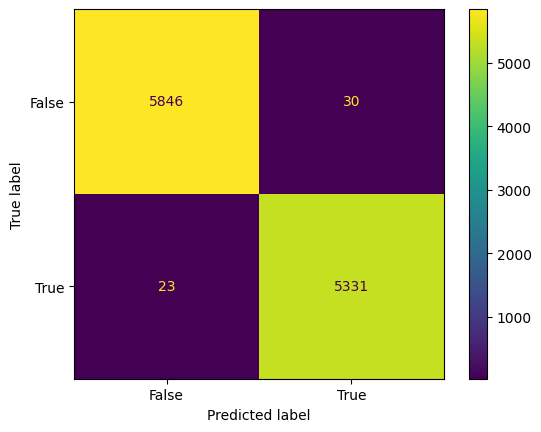

In [39]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

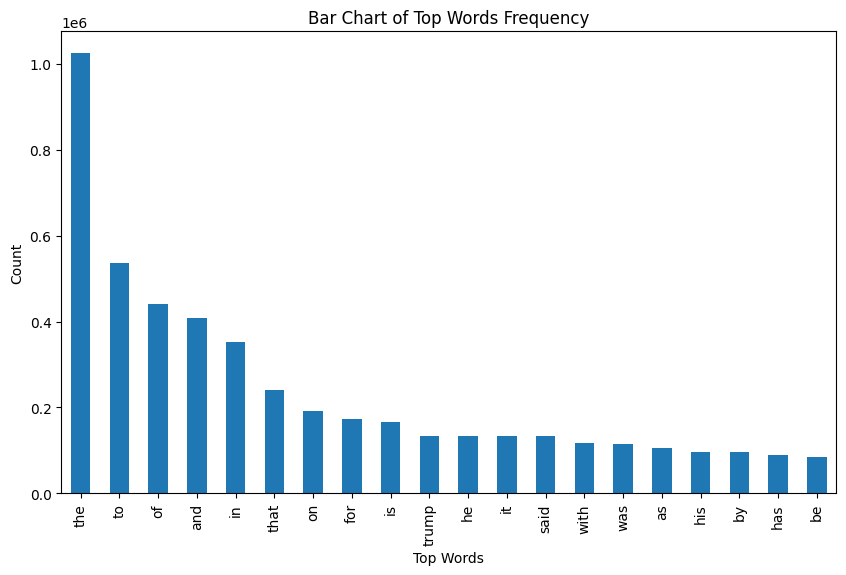

In [40]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)